In [2]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [16, 8]
matplotlib.rcParams.update({'font.size': 22})
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")


Populating the interactive namespace from numpy and matplotlib


In [3]:
# read in the data 
Fdf = pd.read_csv("familyData.csv")
Fdf = Fdf.iloc[:,1:] 
print(Fdf.columns)

Index(['year', 'composition', 'headCount', 'ageHead', 'liquidWealth',
       'laborIncome', 'costPerPerson', 'totalExpense', 'participation',
       'investmentAmount', 'annuityIRA', 'wealthWithoutHomeEquity',
       'wealthWithHomeEquity', 'HomeEquity', 'maritalStatus',
       'employmentStatus', 'education', 'race', 'industry', 'ownership',
       'skillLevel', 'financeExperience', 'ageGroup', 'decadeGroup',
       'stockInvestmentRatio'],
      dtype='object')


### Summary Plots 

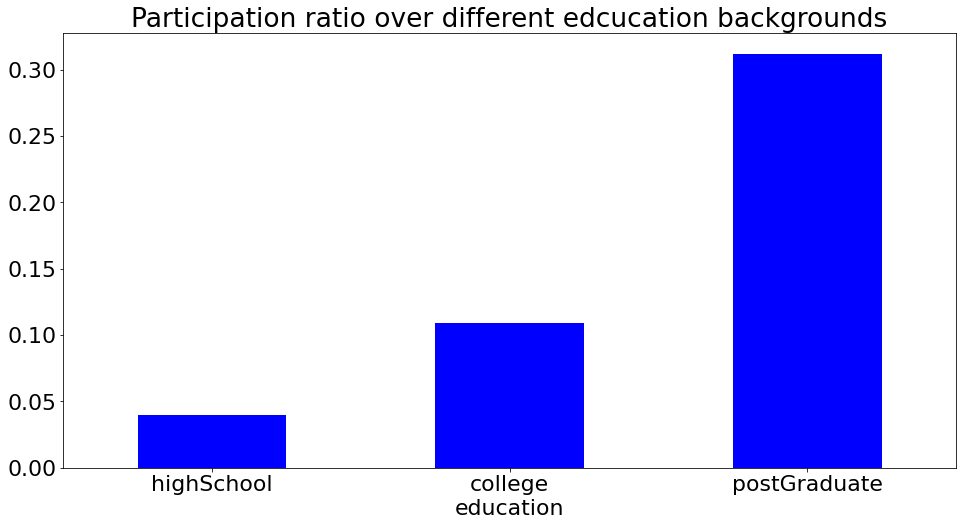

In [4]:
plt.title("Participation ratio over different edcucation backgrounds")
Fdf.loc[Fdf["education"]=="middleSchool", "education"] = "highSchool"
Fdf.groupby("education").participation.mean().reindex(["highSchool", "college", "postGraduate"]).plot.bar(color = "blue",rot=0)
savefig('plots/educationParticipation.jpg')

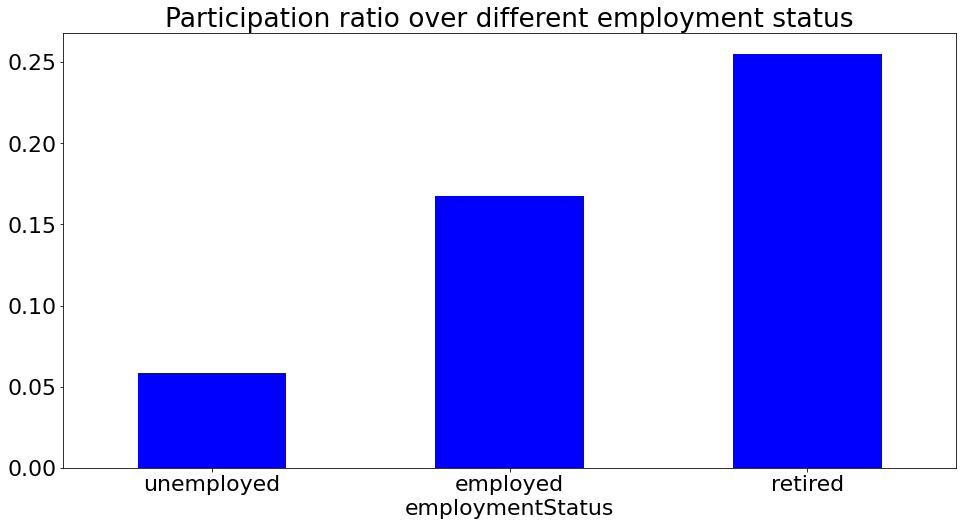

In [5]:
Fdf.loc[Fdf["employmentStatus"]=="Working", "employmentStatus"] = "employed"
plt.title("Participation ratio over different employment status")
Fdf.groupby("employmentStatus").participation.mean().reindex(["unemployed", "employed", "retired"]).plot.bar(color = "blue",rot=0)
savefig('plots/employmentParticipation.jpg')

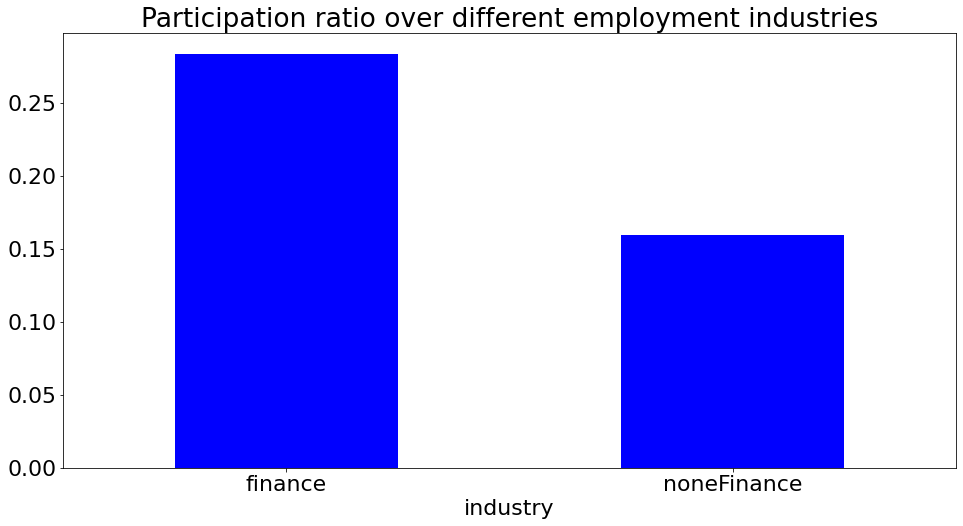

In [6]:
plt.title("Participation ratio over different employment industries")
Fdf.groupby("industry").participation.mean().plot.bar(color = "blue",rot=0)
savefig('plots/industryParticipation.jpg')

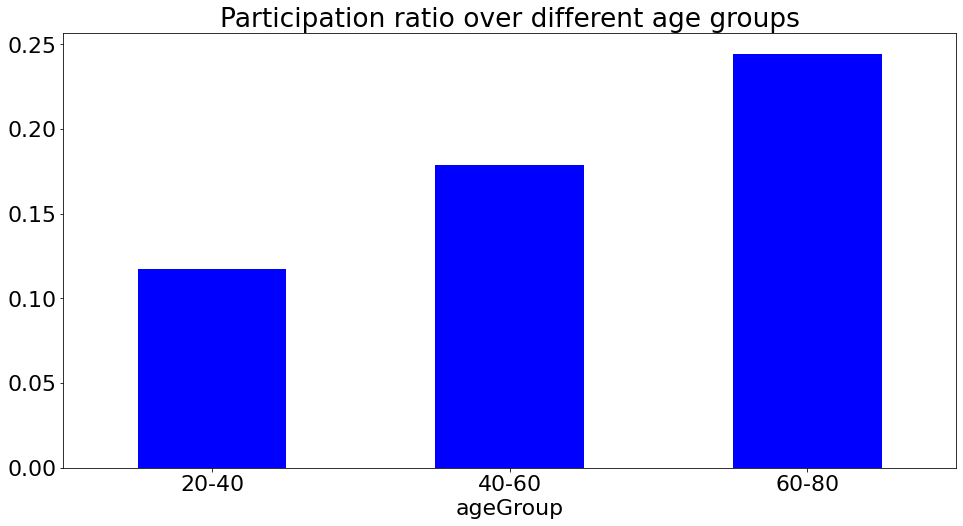

In [7]:
plt.title("Participation ratio over different age groups")
Fdf.groupby("ageGroup").participation.mean().plot.bar(color = "blue",rot=0)
savefig('plots/ageParticipation.jpg')

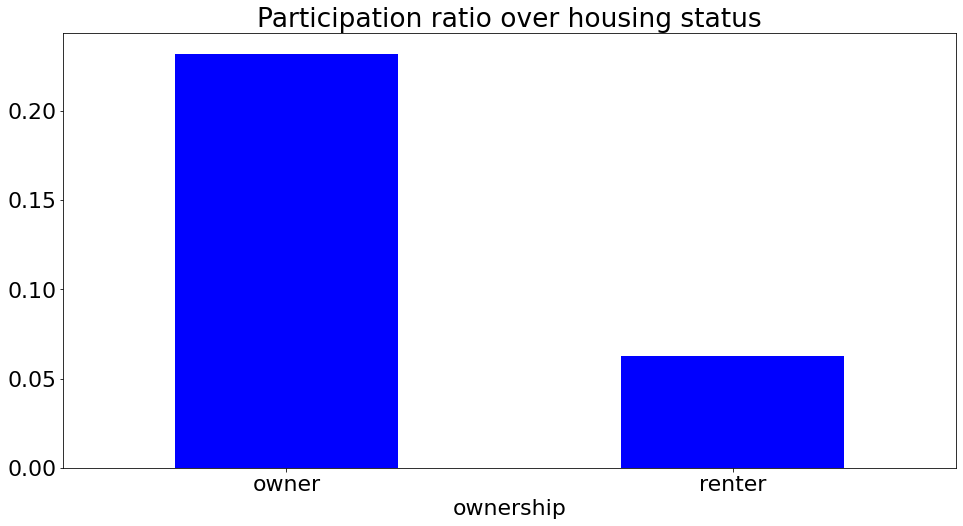

In [8]:
plt.title("Participation ratio over housing status")
Fdf.groupby("ownership").participation.mean().plot.bar(color = "blue",rot=0)
savefig('plots/ownership.jpg')

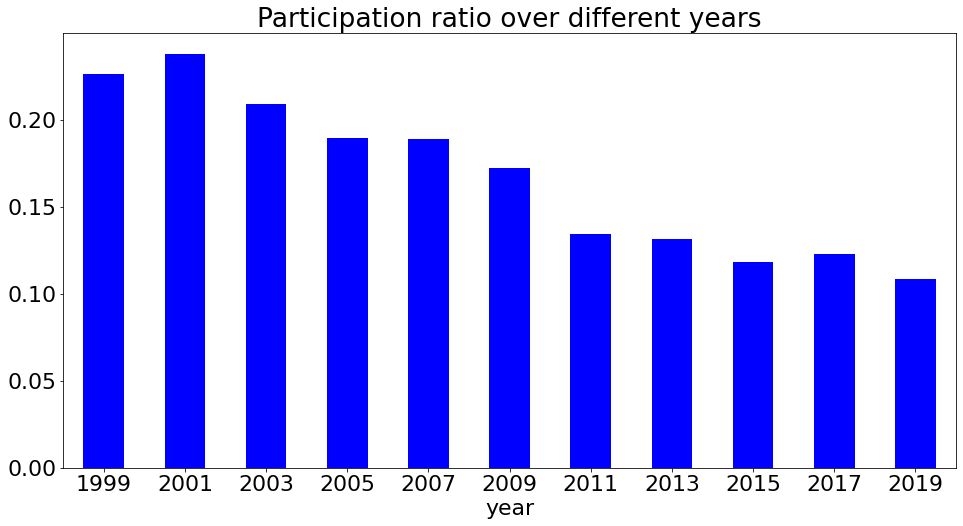

In [9]:
plt.title("Participation ratio over different years")
Fdf.groupby("year").participation.mean().plot.bar(color = "blue",rot=0)
savefig('plots/year.jpg')

In [10]:
Fdf.columns

Index(['year', 'composition', 'headCount', 'ageHead', 'liquidWealth',
       'laborIncome', 'costPerPerson', 'totalExpense', 'participation',
       'investmentAmount', 'annuityIRA', 'wealthWithoutHomeEquity',
       'wealthWithHomeEquity', 'HomeEquity', 'maritalStatus',
       'employmentStatus', 'education', 'race', 'industry', 'ownership',
       'skillLevel', 'financeExperience', 'ageGroup', 'decadeGroup',
       'stockInvestmentRatio'],
      dtype='object')

### Average Income for rich and poor agents 

<AxesSubplot:xlabel='ageHead'>

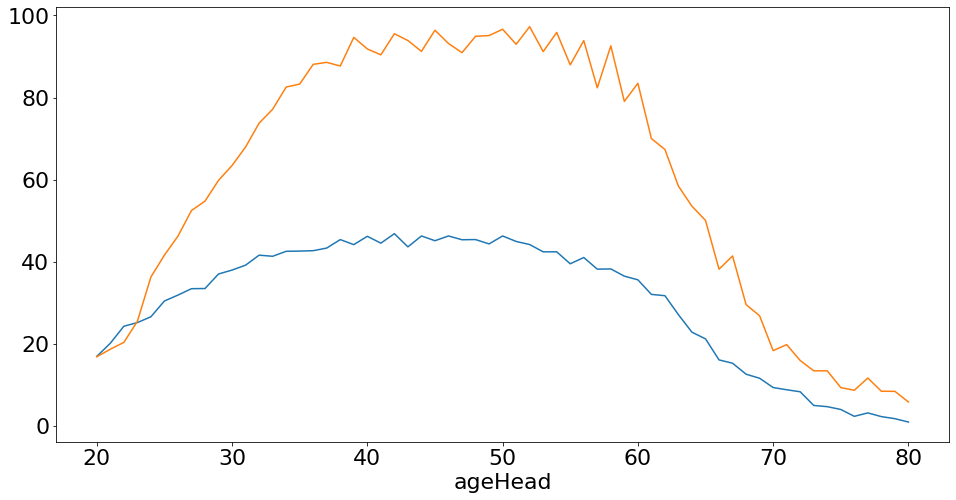

In [11]:
Fdf[(Fdf.education == 'highSchool')|(Fdf.education == 'college')].groupby("ageHead")['laborIncome'].mean().plot(label = "highSchool")
Fdf[Fdf.education == 'postGraduate'].groupby("ageHead")['laborIncome'].mean().plot(label = "postGraduate")

In [12]:
from scipy.signal import savgol_filter
lowIncome_mean = Fdf[(Fdf.education == 'highSchool')|(Fdf.education == 'college')].groupby("ageHead")['laborIncome'].mean().values
highIncome_mean = Fdf[Fdf.education == 'postGraduate'].groupby("ageHead")['laborIncome'].mean().values

lowIncome_median = Fdf[(Fdf.education == 'highSchool')|(Fdf.education == 'college')].groupby("ageHead")['laborIncome'].median().values
highIncome_median = Fdf[Fdf.education == 'postGraduate'].groupby("ageHead")['laborIncome'].median().values

highIncomeSmooth = savgol_filter(highIncome_mean,window_length=9,polyorder=1)
lowIncomeSmooth = savgol_filter(lowIncome_mean,window_length=9,polyorder=1)
ages = list(range(20,81))

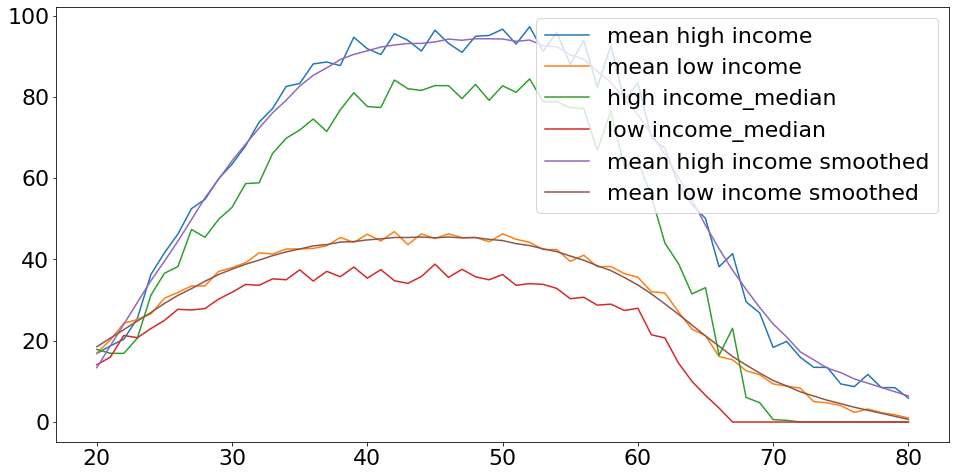

In [15]:
plt.plot(ages, highIncome_mean, label = "mean high income")
plt.plot(ages, lowIncome_mean, label = "mean low income")
plt.plot(ages, highIncome_median, label = "high income_median")
plt.plot(ages, lowIncome_median, label = "low income_median")
plt.plot(ages, highIncomeSmooth, label = "mean high income smoothed")
plt.plot(ages, lowIncomeSmooth, label = "mean low income smoothed")
plt.legend()

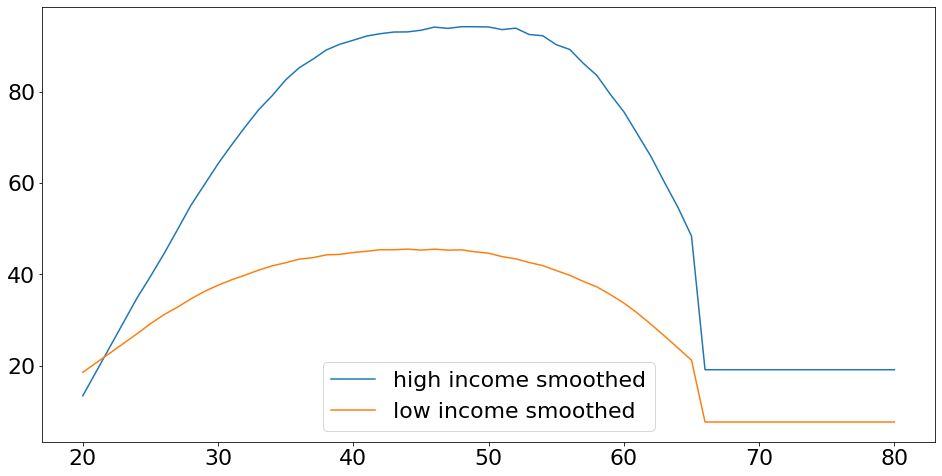

In [16]:
highIncomeSmooth[46:] = np.mean(highIncomeSmooth[46:])
lowIncomeSmooth[46:] = np.mean(lowIncomeSmooth[46:])
plt.plot(ages, highIncomeSmooth, label = "high income smoothed")
plt.plot(ages, lowIncomeSmooth, label = "low income smoothed")
plt.legend()

In [18]:
np.save("../constant/highIncomeDetermined", highIncomeSmooth)
np.save("../constant/lowIncomeDetermined", lowIncomeSmooth)

 ### More summary plots

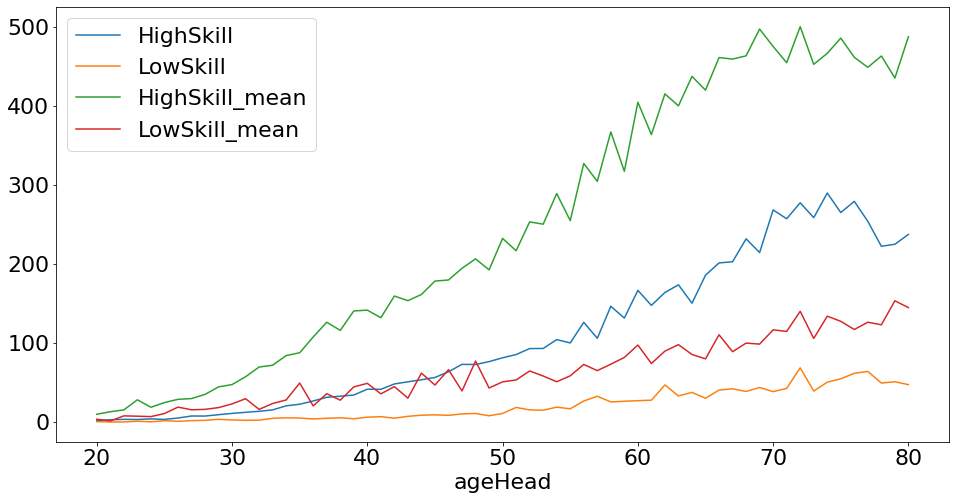

In [19]:
Fdf[Fdf.skillLevel == 'High'].groupby("ageHead")['wealthWithHomeEquity'].median().plot(label = "HighSkill")
Fdf[Fdf.skillLevel == 'Low'].groupby("ageHead")['wealthWithHomeEquity'].median().plot(label = "LowSkill")
Fdf[Fdf.skillLevel == 'High'].groupby("ageHead")['wealthWithHomeEquity'].mean().plot(label = "HighSkill_mean")
Fdf[Fdf.skillLevel == 'Low'].groupby("ageHead")['wealthWithHomeEquity'].mean().plot(label = "LowSkill_mean")
plt.legend()

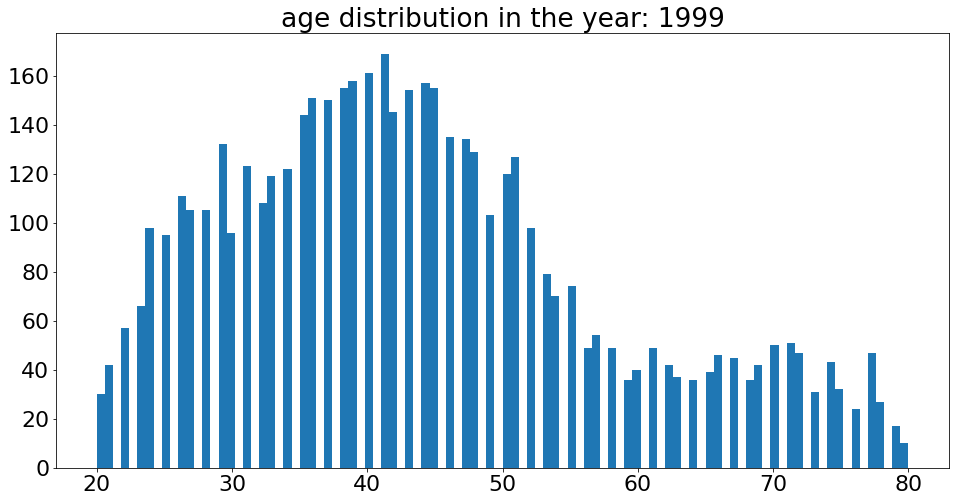

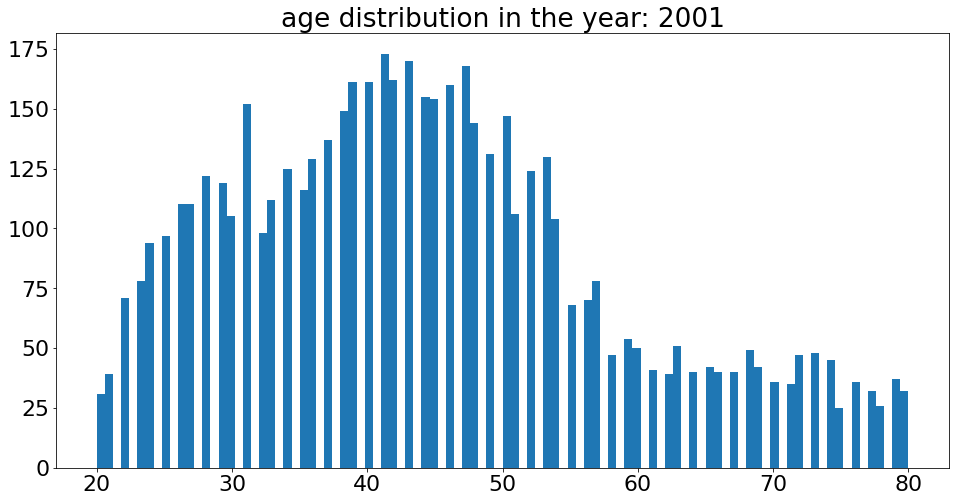

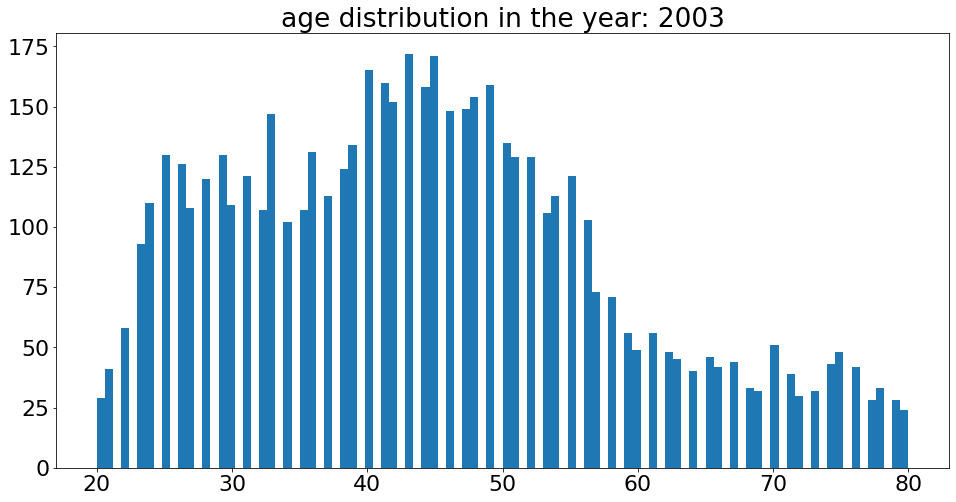

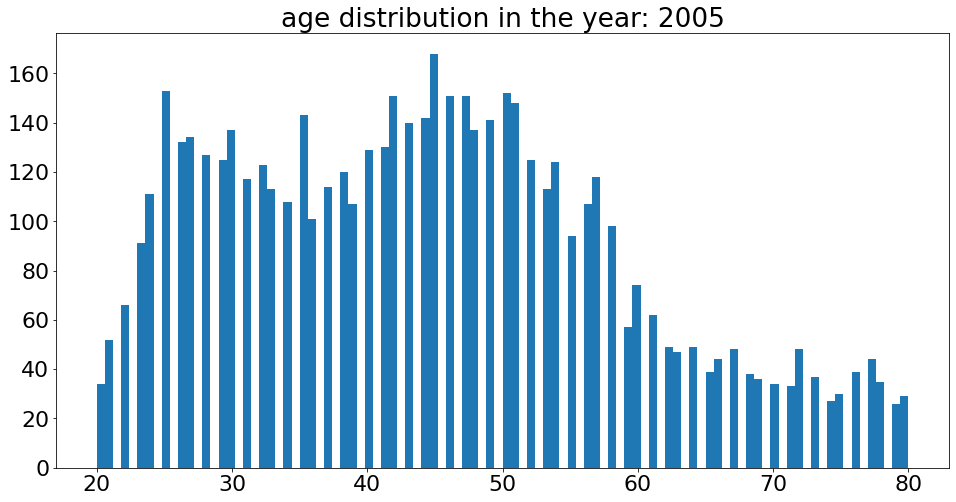

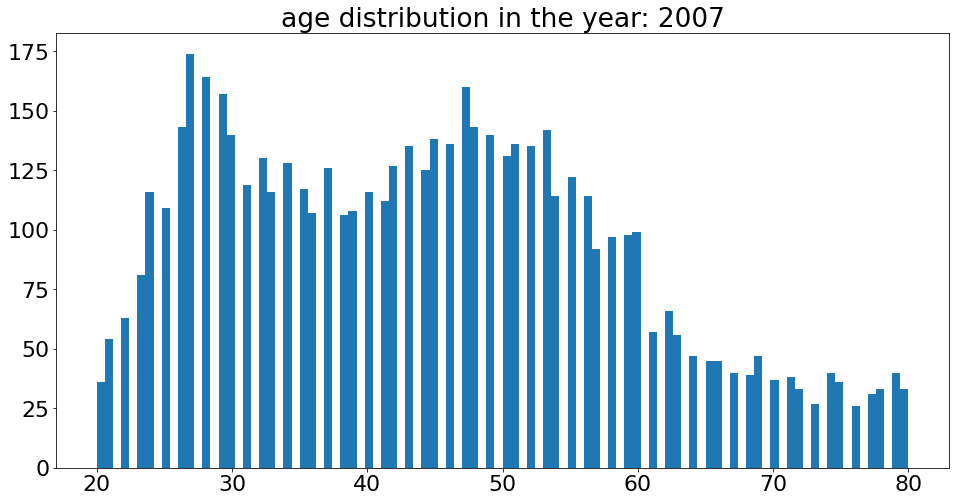

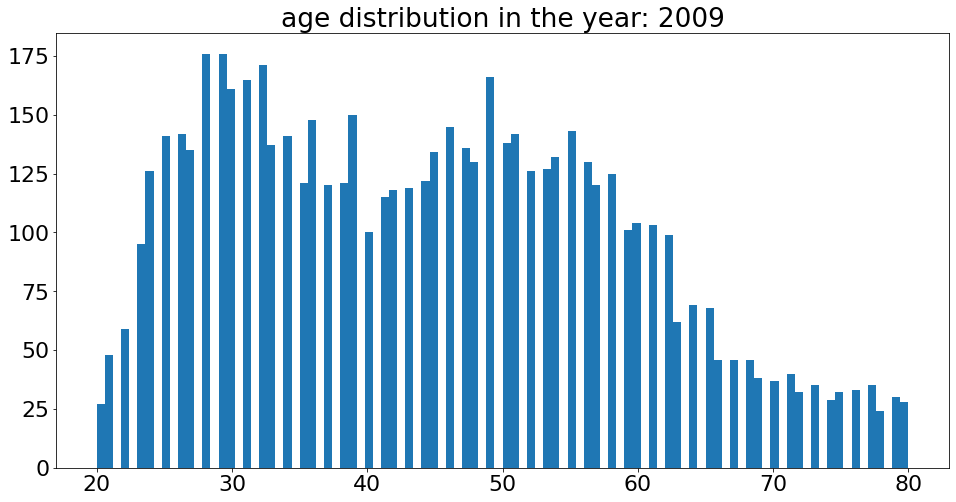

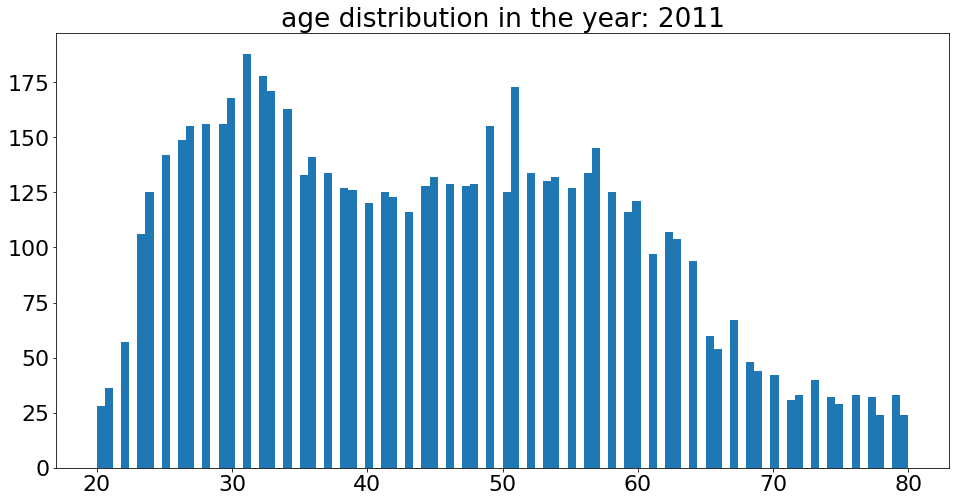

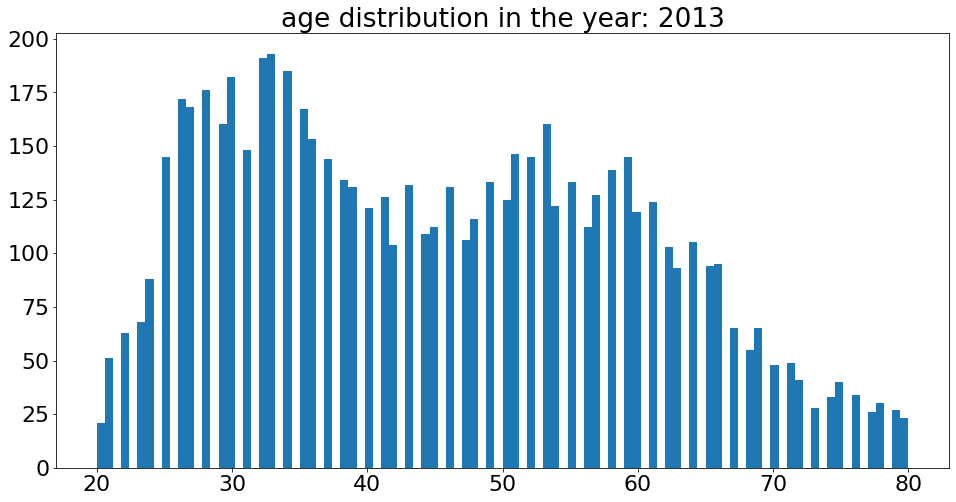

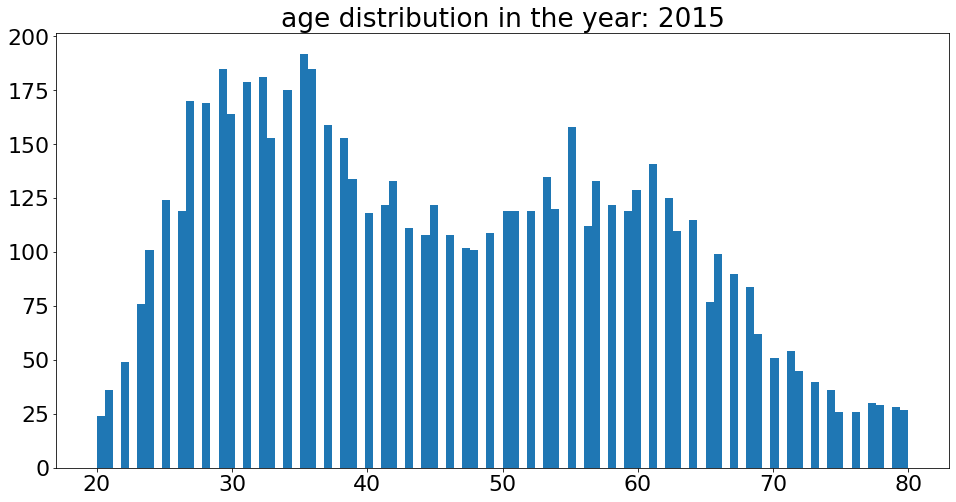

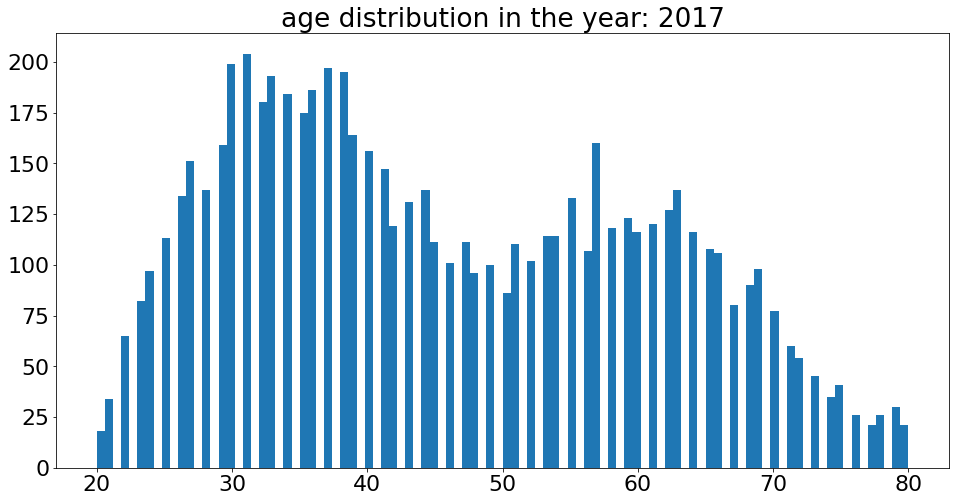

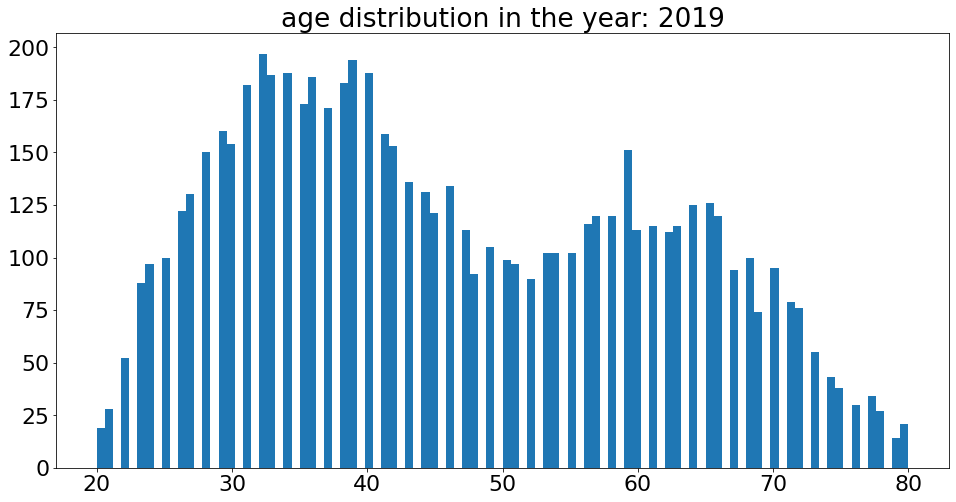

In [22]:
years = list(range(1999,2020,2))
# age distribution seems stable
for year in years:
    plt.figure()
    plt.title("age distribution in the year: " + str(year))
    plt.hist(Fdf[Fdf["year"] == year].ageHead, bins = 100)

### 4 types of agents ratios in the population

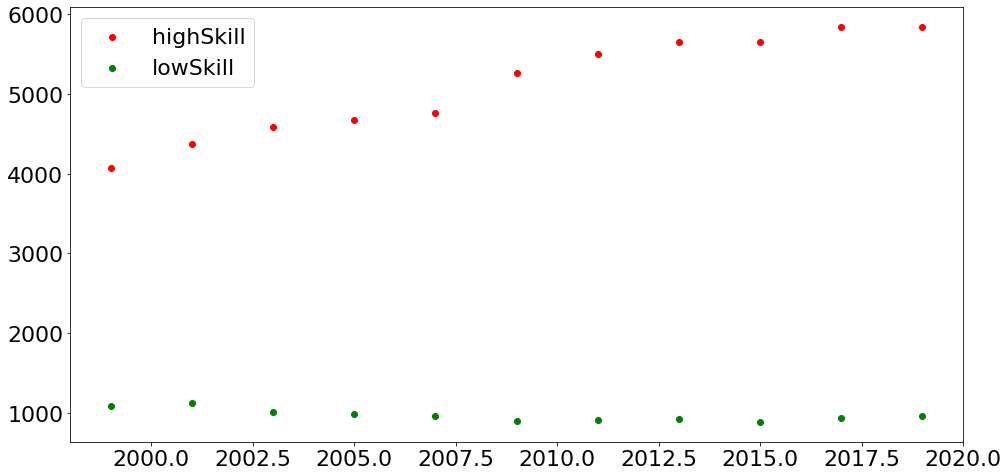

In [23]:
for year in years:
    highSkill = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "High")].shape[0], color = 'r')
    lowSkill = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "Low")].shape[0], color = 'g')
plt.legend((highSkill,lowSkill), ("highSkill", "lowSkill"))

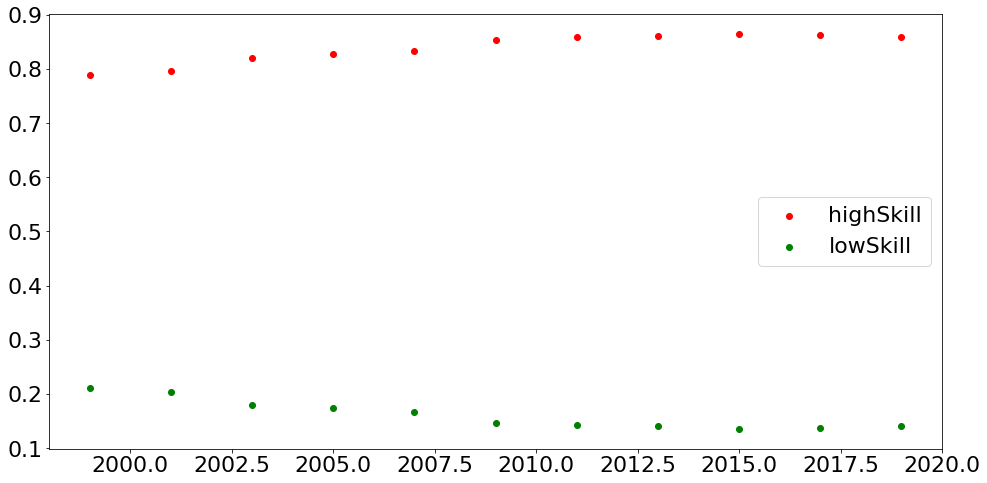

In [24]:
highSkillRatios = []
lowSkillRatios = []
for year in years:
    highRatio = Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "High")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    lowRatio = Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "Low")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    highSkillRatios.append(highRatio)
    lowSkillRatios.append(lowRatio)
    highSkill = plt.scatter(year, highRatio, color = 'r')
    lowSkill = plt.scatter(year, lowRatio, color = 'g')
plt.legend((highSkill,lowSkill), ("highSkill", "lowSkill"))

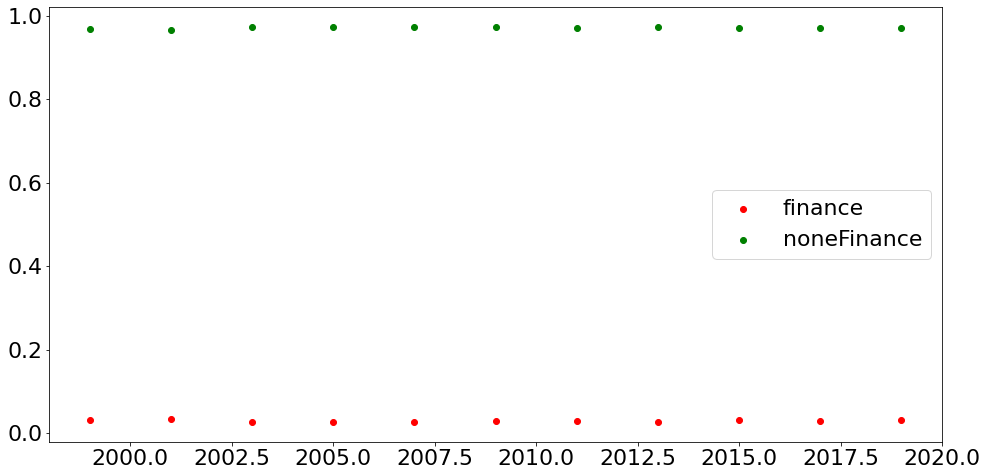

In [25]:
financeRatios = []
noneFinanceRatios= []
for year in years:
    fRatio = Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    nfRatio =  Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    financeRatios.append(fRatio)
    noneFinanceRatios.append(nfRatio)
    finance = plt.scatter(year, fRatio, color = 'r')
    noneFinance = plt.scatter(year, nfRatio, color = 'g')
plt.legend((finance,noneFinance), ("finance", "noneFinance"))

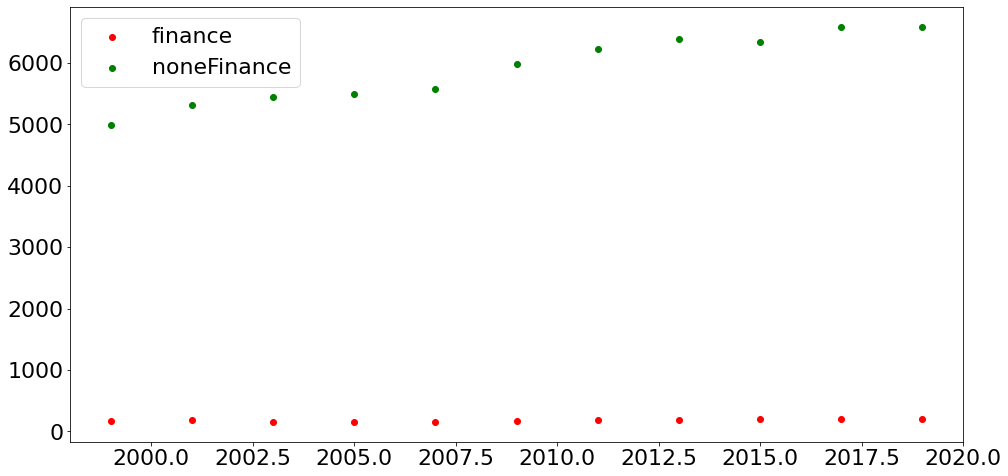

In [26]:
for year in years:
    finance = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")].shape[0], color = 'r')
    nonFinance = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")].shape[0], color = 'g')
plt.legend((finance,noneFinance), ("finance", "noneFinance"))

### empirical classes (richHigh, richLow, poorHigh, poorLow)

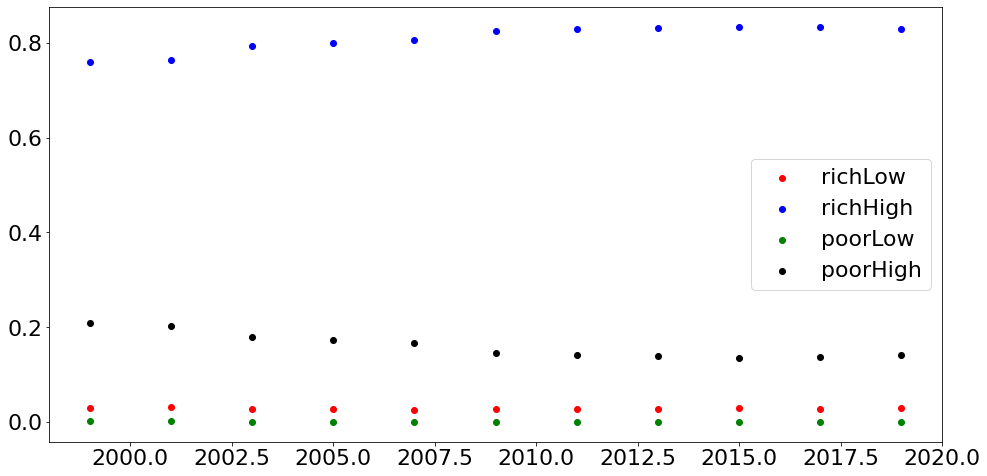

In [28]:
richHighRatios = []
richLowRatios = []
poorHighRatios = []
poorLowRatios = []
for year in years:
    richLow = Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")&(Fdf["skillLevel"] == "High")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    richHigh =  Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")&(Fdf["skillLevel"] == "High")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    poorLow = Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")&(Fdf["skillLevel"] == "Low")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    poorHigh =  Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")&(Fdf["skillLevel"] == "Low")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]   
    richHighRatios.append(richHigh)
    richLowRatios.append(richLow)
    poorHighRatios.append(poorHigh)
    poorLowRatios.append(poorLow)
    rl = plt.scatter(year, richLow, color = "r")
    rh = plt.scatter(year, richHigh, color = "b")
    pl = plt.scatter(year, poorLow, color = "g")
    ph = plt.scatter(year, poorHigh, color = "k")
plt.legend((rl,rh,pl,ph), ("richLow", "richHigh", "poorLow", "poorHigh"))